<a href="https://colab.research.google.com/github/yanuar-pribadii/Pie-Multiple-Linear-Regression/blob/main/multiple_pie_sales_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science DTI 2020 Multiple Linear Regression Muhammad Yanuar Pribadi_DS0216

Multiple linear regression adalah perhitungan statistik untuk mencari hubungan antara 1 **Dependent Variable (Y)** dengan **2 Independent Variable (Xi)atau lebih**. Pada percobaan kali ini dataset yang digunakan adalah penjualan pie oleh distributor untuk mengetahui faktor yang mempengaruhi *Demand* selama 15 Minggu. yang dimana :

1. **Dependent Variable-nya** adalah **Pie Sales**
2. **Independent Variable-nya** adalah **Price dalam Dollar ** **dan Advertising dalam Dollar Ratusan **



In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import dataset pie
df_pie = pd.read_csv('/content/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


# EXPLORATORY DATA ANALYSIS
Exploratory Data Analysis dilakukan dulu untuk mengetahui isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya

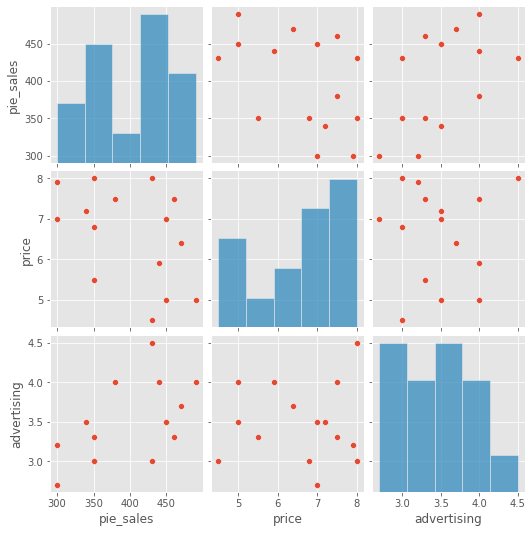

In [ ]:
sns.pairplot(df_pie.drop('week', axis=1))

Jika dilihat dari grafik diatas kita dapat melihat pola antara price dan advertising terhadap pie_sales, yang berarti variabel tersebut saling berhubungan

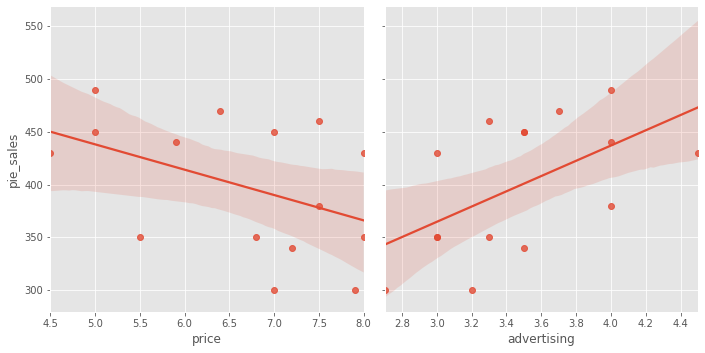

In [ ]:
# visualisasikan data menggunakan scatterplot
g = sns.PairGrid(df_pie, y_vars=["pie_sales"], x_vars=["price", "advertising"], height=5)
g.map(sns.regplot)

dari scatterplot diatas kita bisa menyimpulkan bahwa hubungan antar variabel tersebut adalah


*   Jika nilai **price** semakin tinggi maka nilai **pie_sales** akan menurun
*   Namun jika nilai **advertising** meninggi nilai **pie_sales** akan ikut meninggi pula



# PERIKSA KOLERASI INDEPENDENT VARIABLE DENGAN DEPENDENT VARIABLE DENGAN HEATMAP

# Regression using Sklearn

In [ ]:
X = df_pie[['price', 'advertising']]
Y = df_pie['pie_sales']

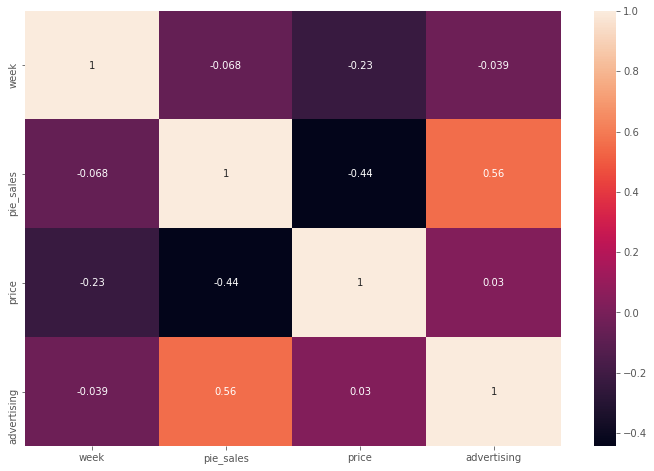

In [ ]:
plt.figure(figsize=(12, 8))

df_pie = df_pie.corr()
sns.heatmap(df_pie, 
            xticklabels = df_pie.columns.values,
            yticklabels = df_pie.columns.values,
            annot = True);

Dilihat dari heatmap diatas bahwa pie_sales memiliki korelas negatif dengan price dan pie_sales memiliki korelasi postif dengan advertising yang berarti ked

In [ ]:
X.head()

,price,advertising
0,5.5,3.3
1,7.5,3.3
2,8.0,3.0
3,8.0,4.5
4,6.8,3.0


In [ ]:
Y.head()

0    350
1    460
2    350
3    430
4    350
Name: pie_sales, dtype: int64

In [ ]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


Dari regresi linear menggunakan Sklearn diatas didapat rumus regresi yakni

y = b0 + b1X1 + b2X2

y = 306.526 - 24.975 (price) + 74.130(advertising)

#Prediksi penjualan jika menginginkan:



1.   price 5.50 Dollar
2.   advertising 350 Dollar. **ingat! karena advertising dalam satuan ratusan Dollar maka harus dirubah dulu sebelum dimasukkan ke rumus rgresi yaitu menjadi 3.50 Dollar**



In [ ]:
predictions = regr.predict([[5.50, 3.5]])
print ('Predicted  pie sale: \n', predictions)

Predicted  pie sale: 
 [428.62155215]


#Regression Using Statsmodel

In [ ]:
X = sm.add_constant(X) # adding a constant

In [ ]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        06:52:11   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

#Analisis dan Penjelasan

Dengan jumlah data (n) = 15
Jumlah Independent Variable (k) = 2

**R-Squared**

Karena hanya ada 2 independent variable maka yang digunakan adalah R-Squared. **Adjusted R-Squared** digunakan untuk variabel independent lebih dari 2.

Dengan nilai R-Squared = 0.521 atau 52.1% berarti variable price dan advertising hanya mempengaruhi 52.1% terhadap variabel pie_sales dan sisa 47.9% dipengaruhi oleh variable yang tidak dimasukkan kedalam dataset



---
**Autokorelasi dengan Durbin Watson**

Cara Membaca Tabel Durbin Watson

n: Jumlah sampel (n)

k: Jumlah variabel

dL: Batas Bawah Durbin Watson

dU: Batas Atas Durbin Watson

**Deteksi Autokorelasi Positif**

Jika d < dL maka terdapat autokorelasi positif,

Jika d > dU maka tidak terdapat autokorelasi positif,

Jika dL < d < dU maka pengujian tidak meyakinkan atau tidak dapat disimpulkan.

**Deteksi Autokorelasi Negatif**

Jika (4 – d) < dL maka terdapat autokorelasi negatif,
Jika (4 – d) > dU maka tidak terdapat autokorelasi negatif,
Jika dL < (4 – d) < dU maka pengujian tidak meyakinkan atau tidak dapat disimpulkan.

Berdasarkan hasil regresi di atas:

dengan sampel data (n)=15 dan independent variable (k)=2, nilai:

Durbin-Watson (D)=1.683.

dL=0.9455

dU=1.5432.

4-d=2.317

dikarenakan **d < dL** dan **(4-d) > dU** maka

**TIDAK TERDAPAT AUTOKORELASI PADA DATA**


---
**Uji Koefisien Regresi Secara Bersama-sama (Uji F)**

Tahap-tahap untuk melakukan uji F adalah sebagai berikut:
1.   Merumuskan Hipotesis

Ho : Tidak ada pengaruh secara signifikan antara variabel price dan advertising

Ha : Ada pengaruh secara signifikan antara variable price dan advertising
2.   Menentukan tingkat signifikansi

Tingkat signifikansi menggunakan a = 5% (signifikansi 5% atau 0,05 adalah ukuran standar yang sering digunakan dalam penelitian)
4.      Menentukan F tabel

Dengan menggunakan tingkat keyakinan 95%, a = 5%, df 1 (jumlah variabel–1)  = 2, dan df 2 (n-k-1) atau 15-2-1  = 12 (n adalah jumlah kasus dan k adalah jumlah variabel independen), hasil diperoleh untuk F tabel sebesar **3.89**.
5.      Kriteria pengujian
- Ho diterima bila F hitung < F tabel
- Ho ditolak bila F hitung > F tabel
6.  Membandingkan F hitung dengan F tabel.

**Karena F-Hitung atau F-Statistic = 6.539 dan F-Tabel = 3.89. Maka F-Hitung > F tabel yang berarti Ho ditolak dan variabel price dan advertising memiliki pengaruh signifikan terhadap pie_sales**

---

**Uji Koefisien Regresi Secara Parsial (Uji t)**

Pengujian koefisien regresi variabel price
1.   Menentukan Hipotesis

Ho : Secara parsial tidak ada pengaruh signifikan antara price dengan pie_sales
Ha : Secara parsial ada pengaruh signifikan antara price dengan pie_sales
2.   Menentukan tingkat signifikansi
           
   Tingkat signifikansi menggunakan a = 5%
3.  Menentukan t hitung

Berdasarkan regresi diperoleh t hitung sebesar **-2.306**

4. Menentukan t tabel

Tabel distribusi t dicari pada a = 5% : 2 = 2,5% (uji 2 sisi) dengan derajat kebebasan (df) n-k-1 atau  15-2-1  = 12 (n adalah jumlah kasus dan k adalah jumlah variabel independen). Dengan pengujian 2 sisi (signifikansi           = 0,025) hasil diperoleh untuk t tabel sebesar 2,17881
5.   Kriteria Pengujian

Ho diterima jika 

-t tabel < t hitung < t tabel

Ho ditolak jika 

-t hitung < -t tabel atau t hitung > t tabel

**Karena  -t hitung (-2.306) < -t tabel (2.17881) maka Ho ditolak yang berarti variabel price memiliki pengaruh signifikan terhadap pie_sales**

---

Pengujian koefisien regresi variabel advertising
1.   Menentukan Hipotesis

Ho : Secara parsial tidak ada pengaruh signifikan antara advertising dengan pie_sales
Ha : Secara parsial ada pengaruh signifikan antara advertising dengan pie_sales
2.   Menentukan tingkat signifikansi
           
   Tingkat signifikansi menggunakan a = 5%
3.  Menentukan t hitung

Berdasarkan regresi diperoleh t hitung sebesar **2.855**

4. Menentukan t tabel

Tabel distribusi t dicari pada a = 5% : 2 = 2,5% (uji 2 sisi) dengan derajat kebebasan (df) n-k-1 atau  15-2-1  = 12 (n adalah jumlah kasus dan k adalah jumlah variabel independen). Dengan pengujian 2 sisi (signifikansi           = 0,025) hasil diperoleh untuk t tabel sebesar 2,17881
5.   Kriteria Pengujian

Ho diterima jika 

-t tabel < t hitung < t tabel

Ho ditolak jika 

-t hitung < -t tabel atau t hitung > t tabel

**Karena t hitung (2.855) > t tabel (2.17881) maka Ho ditolak yang berarti variabel advertising memiliki pengaruh signifikan terhadap pie_sales**

---
**Dengan didapatnya hasil perhitungan diatas dapat kita simpulkan bahwa meski tidak terdapat autokorelasi pada data dan namun variable independent memiliki pengaruh signifikan terhadap penjualan kue pie sebesar 52.1% dan pengaruh lainnya sebesar 47.9% tidak dimasukkan didalam data**

---
Referensi

http://duwiconsultant.blogspot.com/2011/11/analisis-regresi-linier-berganda.html#:~:text=Adjusted%20R%20Square%20adalah%20nilai,R2%20sebagai%20koefisien%20determinasi

https://junaidichaniago.wordpress.com/2010/04/22/download-tabel-f-lengkap/

https://www.statistikian.com/2013/01/uji-f-dan-uji-t.html


